In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Load dataset
X, y = load_wine(return_X_y=True)

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Preprocess data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Create SVM classifier
svm = SVC()

#Train model
svm.fit(X_train, y_train)

#Evaluate model
accuracy = svm.score(X_test, y_test)
print('Accuracy:', accuracy)

#Make predictions
y_pred = svm.predict(X_test)

#Classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



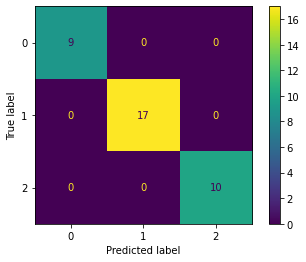

In [2]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, X_test, y_test)

In [3]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)
pred_grid = grid.predict(X_test)
print(classification_report(y_test, pred_grid))

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_grid)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.1

0.9444444444444444

In [4]:
from sklearn.model_selection import cross_val_score
svc_cross_validation = cross_val_score(svm, X_train, y_train, cv=10)
print(svc_cross_validation)
print('Mean Score =', svc_cross_validation.mean().round(5)*100,'%')

[1.         1.         1.         0.92857143 1.         1.
 1.         0.92857143 1.         1.        ]
Mean Score = 98.571 %
